# Importing Libraries

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, auc, roc_curve
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Adding the dataset


In [70]:
df = pd.read_csv("/content/drive/MyDrive/Portfolio_Project/DataCoSupplyChainDataset.csv", encoding='unicode_escape')

# Data Profiling

First ten rows:

In [71]:
df.head(10)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class
5,TRANSFER,6,4,18.580000,294.980011,Shipping canceled,0,73,Sporting Goods,Tonawanda,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/19/2018 11:03,Standard Class
6,DEBIT,2,1,95.180000,288.420013,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 10:42,First Class
7,TRANSFER,2,1,68.430000,285.140015,Late delivery,1,73,Sporting Goods,Miami,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 10:21,First Class
8,CASH,3,2,133.720001,278.589996,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 10:00,Second Class
9,CASH,2,1,132.149994,275.309998,Late delivery,1,73,Sporting Goods,San Ramon,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 9:39,First Class


Last ten rows:

In [72]:
df.tail(10)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
180509,PAYMENT,3,4,0.000000,335.980011,Advance shipping,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 6:49,Standard Class
180510,PAYMENT,3,4,165.990005,331.980011,Advance shipping,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 6:49,Standard Class
180511,DEBIT,2,2,157.429993,327.980011,Shipping on time,0,45,Fishing,Chula Vista,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 6:28,Second Class
180512,DEBIT,6,4,86.400002,319.980011,Late delivery,1,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/22/2016 6:07,Standard Class
180513,PAYMENT,3,4,119.989998,299.989990,Advance shipping,0,45,Fishing,Lancaster,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 5:04,Standard Class
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class
180518,PAYMENT,4,4,168.949997,383.980011,Shipping on time,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 18:54,Standard Class


Number of rows and columns:

In [73]:
# get the number of rows and columns
rows = df.shape[0]
columns = df.shape[1]

print(f'Rows = {rows}\nColumns = {columns}')

Rows = 180519
Columns = 53


Columns of the Data:

In [74]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

# Unique values for the Categorical columns

In [75]:
UNIQUE_VAL = {
    "Type": df['Type'].unique(),
    "Delivery Status": df['Delivery Status'].unique(),
    "Late_delivery_risk": df['Late_delivery_risk'].unique(),
    "Department Name": df['Department Name'].unique(),
    "Category Name": df['Category Name'].unique(),
    "Market": df['Market'].unique(),
    "Customer Segment": df['Customer Segment'].unique(),
    "Order Status": df['Order Status'].unique(),
    "Shipping Mode": df['Shipping Mode'].unique()
}
UNIQUE_VAL

{'Type': array(['DEBIT', 'TRANSFER', 'CASH', 'PAYMENT'], dtype=object),
 'Delivery Status': array(['Advance shipping', 'Late delivery', 'Shipping on time',
        'Shipping canceled'], dtype=object),
 'Late_delivery_risk': array([0, 1]),
 'Department Name': array(['Fitness', 'Apparel', 'Golf', 'Footwear', 'Outdoors', 'Fan Shop',
        'Technology', 'Book Shop', 'Discs Shop', 'Pet Shop',
        'Health and Beauty '], dtype=object),
 'Category Name': array(['Sporting Goods', 'Cleats', 'Shop By Sport', "Women's Apparel",
        'Electronics', 'Boxing & MMA', 'Cardio Equipment', 'Trade-In',
        "Kids' Golf Clubs", 'Hunting & Shooting', 'Baseball & Softball',
        "Men's Footwear", 'Camping & Hiking', 'Consumer Electronics',
        'Cameras ', 'Computers', 'Basketball', 'Soccer', "Girls' Apparel",
        'Accessories', "Women's Clothing", 'Crafts', "Men's Clothing",
        'Tennis & Racquet', 'Fitness Accessories', 'As Seen on  TV!',
        'Golf Balls', 'Strength Training',

Information about the number of non-null values and data type:

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

Total number of null values in each column:

In [77]:
df.isnull().sum()

,0
Type,0
Days for shipping (real),0
Days for shipment (scheduled),0
Benefit per order,0
Sales per customer,0
Delivery Status,0
Late_delivery_risk,0
Category Id,0
Category Name,0
Customer City,0


Number of unique values in each column:

In [78]:
df.nunique()

,0
Type,4
Days for shipping (real),7
Days for shipment (scheduled),4
Benefit per order,21998
Sales per customer,2927
Delivery Status,4
Late_delivery_risk,2
Category Id,51
Category Name,50
Customer City,563


Statistics of each numerical column:

In [79]:
df.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,...,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,...,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


Staistics of each categorical column:

In [80]:
df.describe(include='object')

,Type,Delivery Status,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Lname,Customer Password,Customer Segment,...,Order City,Order Country,order date (DateOrders),Order Region,Order State,Order Status,Product Image,Product Name,shipping date (DateOrders),Shipping Mode
count,180519,180519,180519,180519,180519,180519,180519,180511,180519,180519,...,180519,180519,180519,180519,180519,180519,180519,180519,180519,180519
unique,4,4,50,563,2,1,782,1109,1,3,...,3597,164,65752,23,1089,9,118,118,63701,4
top,DEBIT,Late delivery,Cleats,Caguas,EE. UU.,XXXXXXXXX,Mary,Smith,XXXXXXXXX,Consumer,...,Santo Domingo,Estados Unidos,12/14/2016 12:29,Central America,Inglaterra,COMPLETE,http://images.acmesports.sports/Perfect+Fitnes...,Perfect Fitness Perfect Rip Deck,1/5/2016 5:58,Standard Class
freq,69295,98977,24551,66770,111146,180519,65150,64104,180519,93504,...,2211,24840,5,28341,6722,59491,24515,24515,10,107752


# Data Wrangling

## Dropping columns that include a high number of null values or redundant data:

- Customer Email: 0 Null Values (Not importent)

- Customer Fname: 0 Null Values (Not importent)

- Customer Lname: 8 Null Values (Not importent)

- Customer Password: 0 Null Values (Not importent)

- Customer Zipcode: 3 Null Values (Not importent)

- Latitude: 0 Null Values (Not importent)

- Longitude: 0 Null Values (Not importent)

- Order Zipcode: 155679 Null Values

- Product Image: 0 Null Values (Not importent)

- Product Description: 180519 Null values

- Product Status: 0 Null values ( it has the same data)

In [81]:

df.drop(["Customer Email", "Customer Fname", "Customer Lname", "Customer Password", "Customer Zipcode", "Order Zipcode", "Product Image", "Product Description", "Product Status"], axis=1, inplace=True)


## Convert Late_delivery_risk from 0, 1 to categories

In [82]:
df['Late_delivery_risk'].replace({0: 'On Time', 1: 'Late'}, inplace=True)

<ipython-input-82-9ce042b54000>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Late_delivery_risk'].replace({0: 'On Time', 1: 'Late'}, inplace=True)


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 44 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  object 
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Id                    180519 non-null  int64  
 12  Customer Segment              

Check the total null values again:

In [84]:
df.isnull().sum()

,0
Type,0
Days for shipping (real),0
Days for shipment (scheduled),0
Benefit per order,0
Sales per customer,0
Delivery Status,0
Late_delivery_risk,0
Category Id,0
Category Name,0
Customer City,0


Check the statistics of the numerical wrangled data:

In [85]:
df.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Category Id,Customer Id,Department Id,Latitude,Longitude,Order Customer Id,...,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Card Id,Product Category Id,Product Price
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000
mean,3.497654,2.931847,21.974989,183.107609,31.851451,6691.379495,5.443460,29.719955,-84.915675,6691.379495,...,90260.000000,141.232550,0.120647,2.127638,203.772096,183.107609,21.974989,692.509764,31.851451,141.232550
std,1.623722,1.374449,104.433526,120.043670,15.640064,4162.918106,1.629246,9.813646,21.433241,4162.918106,...,52111.490959,139.732492,0.466796,1.453451,132.273077,120.043670,104.433526,336.446807,15.640064,139.732492
min,0.000000,0.000000,-4274.979980,7.490000,2.000000,1.000000,2.000000,-33.937553,-158.025986,1.000000,...,1.000000,9.990000,-2.750000,1.000000,9.990000,7.490000,-4274.979980,19.000000,2.000000,9.990000
25%,2.000000,2.000000,7.000000,104.379997,18.000000,3258.500000,4.000000,18.265432,-98.446312,3258.500000,...,45130.500000,50.000000,0.080000,1.000000,119.980003,104.379997,7.000000,403.000000,18.000000,50.000000
50%,3.000000,4.000000,31.520000,163.990005,29.000000,6457.000000,5.000000,33.144863,-76.847908,6457.000000,...,90260.000000,59.990002,0.270000,1.000000,199.919998,163.990005,31.520000,627.000000,29.000000,59.990002
75%,5.000000,4.000000,64.800003,247.399994,45.000000,9779.000000,7.000000,39.279617,-66.370583,9779.000000,...,135389.500000,199.990005,0.360000,3.000000,299.950012,247.399994,64.800003,1004.000000,45.000000,199.990005
max,6.000000,4.000000,911.799988,1939.989990,76.000000,20757.000000,12.000000,48.781933,115.263077,20757.000000,...,180519.000000,1999.989990,0.500000,5.000000,1999.989990,1939.989990,911.799988,1363.000000,76.000000,1999.989990


Check the statistics of the categorical wrangled data:

In [86]:
df.describe(include='object')

,Type,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Customer Street,Department Name,Market,Order City,Order Country,order date (DateOrders),Order Region,Order State,Order Status,Product Name,shipping date (DateOrders),Shipping Mode
count,180519,180519,180519,180519,180519,180519,180519,180519,180519,180519,180519,180519,180519,180519,180519,180519,180519,180519,180519,180519
unique,4,4,2,50,563,2,3,46,7458,11,5,3597,164,65752,23,1089,9,118,63701,4
top,DEBIT,Late delivery,Late,Cleats,Caguas,EE. UU.,Consumer,PR,9126 Wishing Expressway,Fan Shop,LATAM,Santo Domingo,Estados Unidos,12/14/2016 12:29,Central America,Inglaterra,COMPLETE,Perfect Fitness Perfect Rip Deck,1/5/2016 5:58,Standard Class
freq,69295,98977,98977,24551,66770,111146,93504,69373,122,66861,51594,2211,24840,5,28341,6722,59491,24515,10,107752


In [87]:
rows = df.shape[0]
columns = df.shape[1]

print(f'Rows = {rows}\nColumns = {columns}')

Rows = 180519
Columns = 44


## Convert date columns to DateTime

In [88]:
df["order date (DateOrders)"] = pd.to_datetime(df["order date (DateOrders)"])
df["shipping date (DateOrders)"] = pd.to_datetime(df["shipping date (DateOrders)"])

________________________________________________________________________________________________________
# EDA

# Data Overview

In [89]:
start_date = df['order date (DateOrders)'].min()
end_date = df['order date (DateOrders)'].max()

print(f"Time Period: From {start_date.date()} to {end_date.date()}")

Time Period: From 2015-01-01 to 2018-01-31


In [90]:
unique_regions = df[['Order Region']].drop_duplicates()

print("Regions Covered:")
print(unique_regions)


Regions Covered:
        Order Region
0     Southeast Asia
1         South Asia
3            Oceania
6       Eastern Asia
49         West Asia
55      West of USA 
58        US Center 
59       West Africa
60    Central Africa
62      North Africa
63    Western Europe
67   Northern Europe
74   Central America
77         Caribbean
78     South America
139      East Africa
145  Southern Europe
189      East of USA
192           Canada
215  Southern Africa
253     Central Asia
301   Eastern Europe
478   South of  USA 


In [91]:
total_orders = len(df)
total_canceled_deliveries = len(df) - len(df[df['Delivery Status'] != 'Shipping canceled'])
total_deliveries = len(df) - len(df[df['Delivery Status'] == 'Shipping canceled'])

print(f"Total orders: {total_orders}")
print(f"Total canceled deliveries: {total_canceled_deliveries}")
print(f"Total deliveries: {total_deliveries}")

Total orders: 180519
Total canceled deliveries: 7754
Total deliveries: 172765


In [92]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Type', 'Delivery Status', 'Late_delivery_risk', 'Category Name',
       'Customer City', 'Customer Country', 'Customer Segment',
       'Customer State', 'Customer Street', 'Department Name', 'Market',
       'Order City', 'Order Country', 'Order Region', 'Order State',
       'Order Status', 'Product Name', 'Shipping Mode'],
      dtype='object')

In [93]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Category Id', 'Customer Id',
       'Department Id', 'Latitude', 'Longitude', 'Order Customer Id',
       'Order Id', 'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Product Card Id',
       'Product Category Id', 'Product Price'],
      dtype='object')

# Delivery Performance

### Late Delivery Risk:
The Late_delivery_risk column indicates whether an order is at risk of being delivered late or is actually bieng delivered late.

In [94]:
on_time_deliveries = df[df['Late_delivery_risk'] == 'On Time']
late_deliveries = df[df['Late_delivery_risk'] == 'Late']

on_time_rate = (len(on_time_deliveries) / len(df)) * 100
late_rate = (len(late_deliveries) / len(df)) * 100

print(f"On-time delivery rate: {on_time_rate:.2f}%")
print(f"Late delivery rate: {late_rate:.2f}%")


On-time delivery rate: 45.17%
Late delivery rate: 54.83%


In [95]:
df['Delivery Time'] = (df['shipping date (DateOrders)'] - df['order date (DateOrders)']).dt.days
avg_delivery_time = df['Delivery Time'].mean()
print(f"Average delivery time: {avg_delivery_time:.2f} days")


Average delivery time: 3.47 days


In [96]:
late_risk = df.groupby('Late_delivery_risk')['Order Id'].count()
late_risk


,Order Id
Late_delivery_risk,
Late,98977
On Time,81542


### The below figure shows the disterbution of Late and On Time deliveries, and the disterbution of the delivery status: Advanced, Late, Canceled, and on time

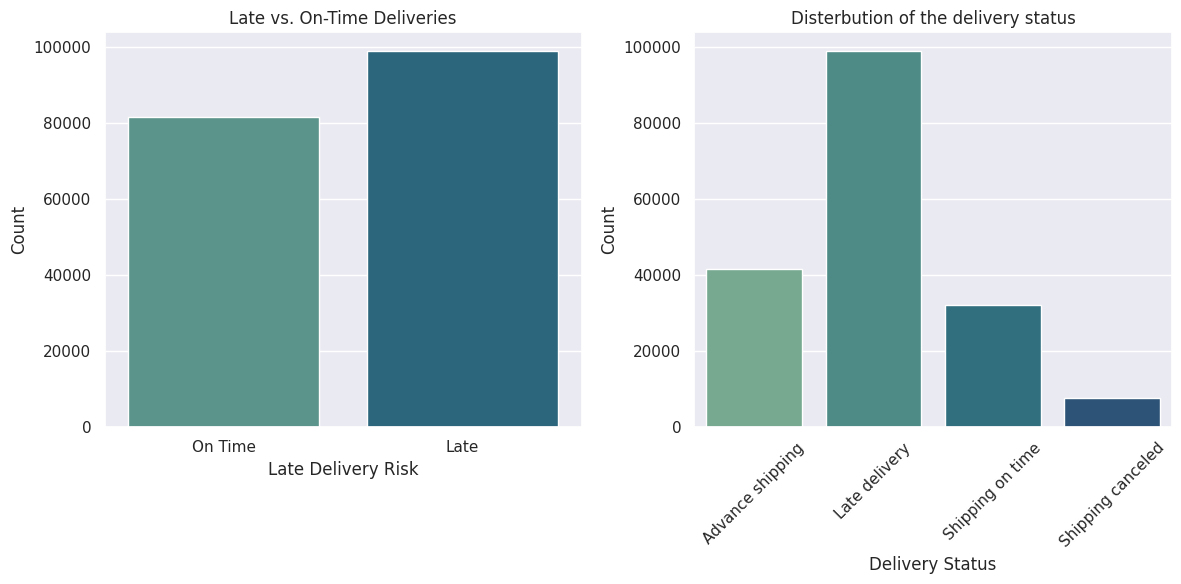

In [97]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Late_delivery_risk', hue='Late_delivery_risk', data=df, palette="crest")
plt.title('Late vs. On-Time Deliveries')
plt.xlabel('Late Delivery Risk')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
sns.countplot(x='Delivery Status', hue='Delivery Status', data=df, palette="crest")
plt.title('Disterbution of the delivery status')
plt.xlabel('Delivery Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

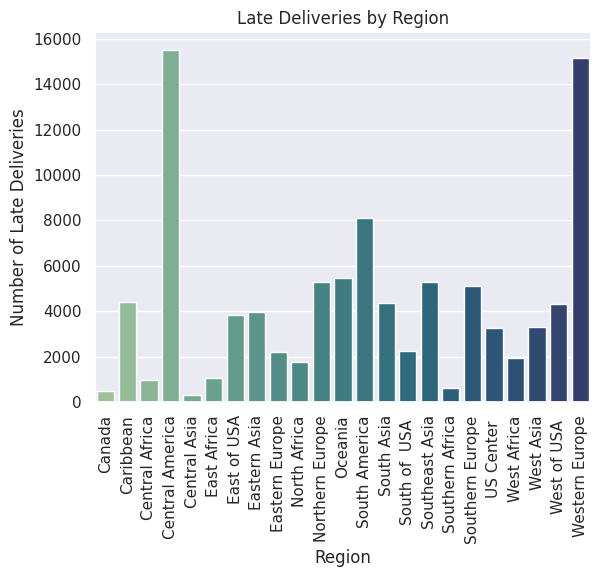

In [98]:
late_delivery_risk = df[df['Late_delivery_risk'] == "Late"].groupby('Order Region').size()
sns.barplot(x=late_delivery_risk.index, y=late_delivery_risk.values, hue=late_delivery_risk.index, palette='crest')
plt.title('Late Deliveries by Region')
plt.xlabel('Region')
plt.ylabel('Number of Late Deliveries')
plt.xticks(rotation=90)
plt.show()

In [99]:
region_performance = df.groupby('Order Region')['Delivery Status'].value_counts()
region_performance

Order Region    Delivery Status  
Canada          Late delivery          468
                Advance shipping       282
                Shipping on time       157
                Shipping canceled       52
Caribbean       Late delivery         4415
                                     ...  
West of USA     Shipping canceled      398
Western Europe  Late delivery        15140
                Advance shipping      6138
                Shipping on time      4589
                Shipping canceled     1242
Name: count, Length: 92, dtype: int64

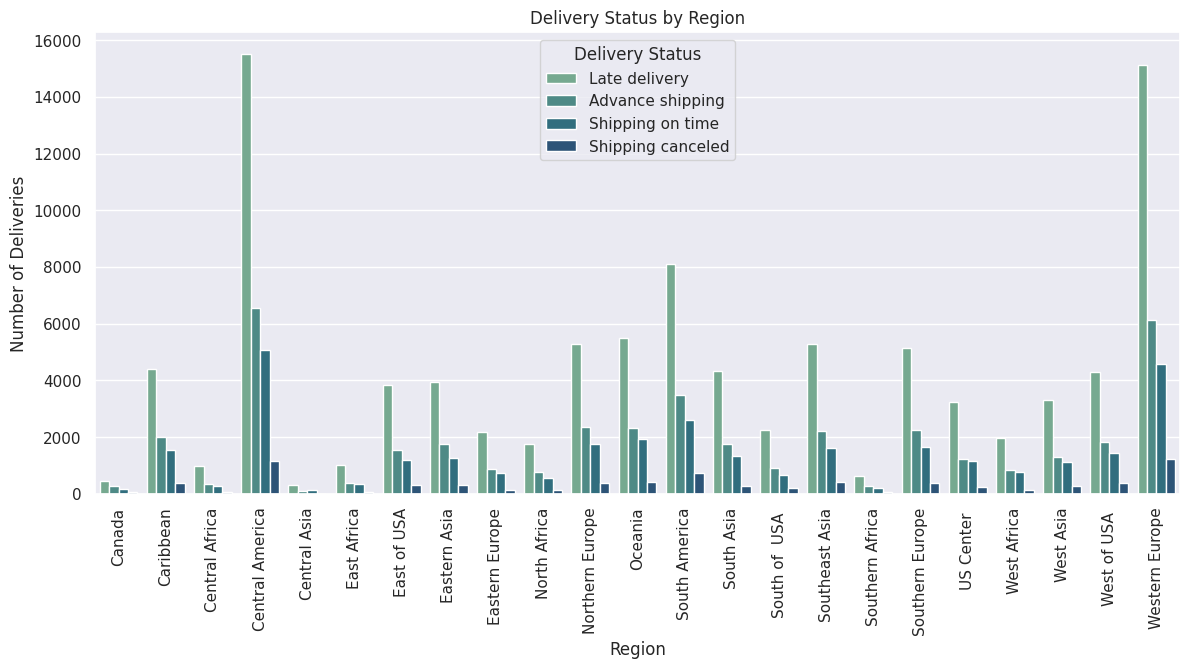

In [100]:
plt.figure(figsize=(14, 6))
sns.barplot(x=region_performance.index.get_level_values(0), y=region_performance.values, hue=region_performance.index.get_level_values(1), palette='crest')
plt.title('Delivery Status by Region')
plt.xlabel('Region')
plt.ylabel('Number of Deliveries')
plt.xticks(rotation=90)
plt.show()

### Shipping Days Comparison:

In [101]:
shipping_mode_comparison = df.groupby('Shipping Mode')['Days for shipping (real)'].mean().reset_index()


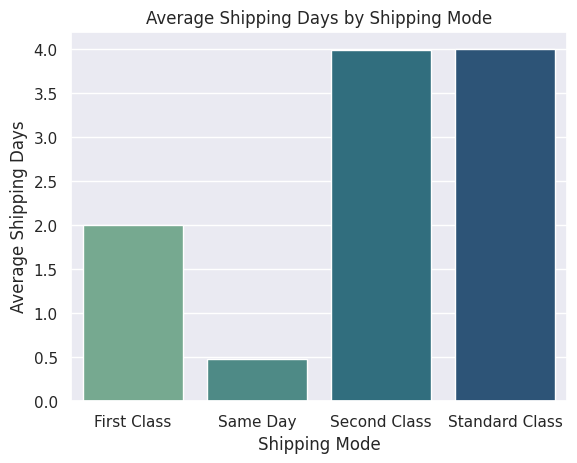

In [102]:
sns.barplot(data=shipping_mode_comparison, x='Shipping Mode', y='Days for shipping (real)', hue="Shipping Mode", palette='crest')
plt.title("Average Shipping Days by Shipping Mode")
plt.xlabel("Shipping Mode")
plt.ylabel("Average Shipping Days")
plt.show()

In [103]:
df['Shipping Delay'] = df['Days for shipping (real)'] - df['Days for shipment (scheduled)']
df['Shipping Delay']

,Shipping Delay
0,-1
1,1
2,0
3,-1
4,-2
...,...
180514,0
180515,1
180516,1
180517,-1




Days for shipping (real): Actual number of days taken to ship the order.

Days for shipment (scheduled): Scheduled number of days for the shipment.

Positive values indicate delays.

Negative or zero values indicate on-time or early deliveries.

### Shipping Days by Customer Segment

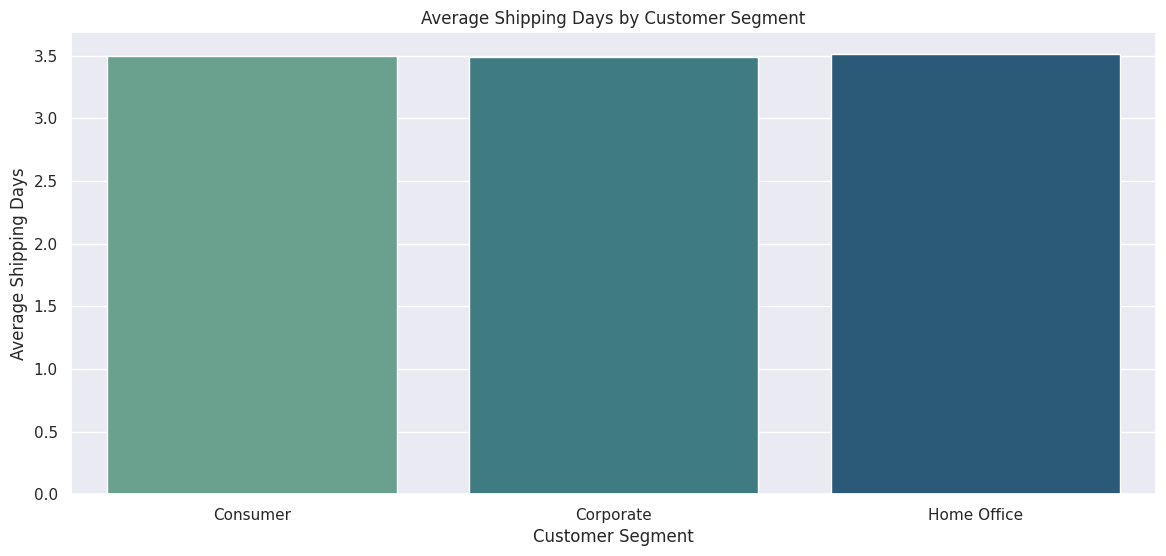

In [104]:
customer_segment_comparison = df.groupby('Customer Segment')['Days for shipping (real)'].mean().reset_index()
plt.figure(figsize=(14, 6))
sns.barplot(data=customer_segment_comparison, x='Customer Segment', y='Days for shipping (real)', hue="Customer Segment", palette='crest')
plt.title("Average Shipping Days by Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Average Shipping Days")
plt.show()

### Shipping Days by Region

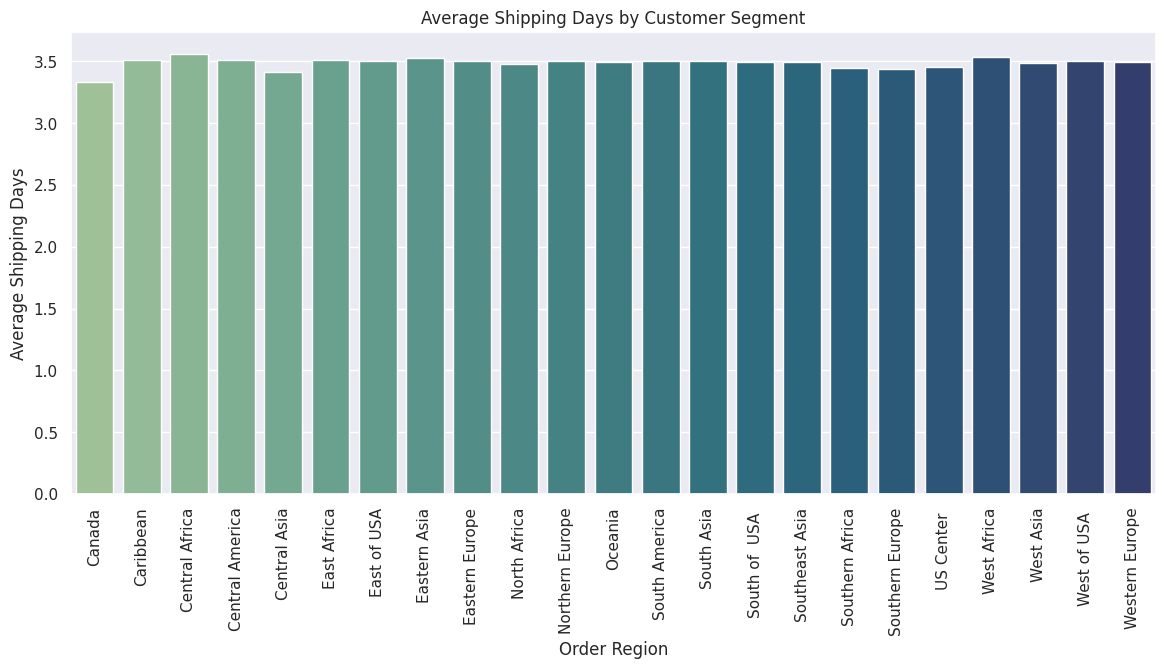

In [105]:
region_comparison = df.groupby('Order Region')['Days for shipping (real)'].mean().reset_index()
plt.figure(figsize=(14, 6))
sns.barplot(data=region_comparison, x='Order Region', y='Days for shipping (real)', hue="Order Region", palette='crest')
plt.title("Average Shipping Days by Customer Segment")
plt.xlabel("Order Region")
plt.ylabel("Average Shipping Days")
plt.xticks(rotation=90)
plt.show()


### Shipping Days vs. Late Delivery Risk

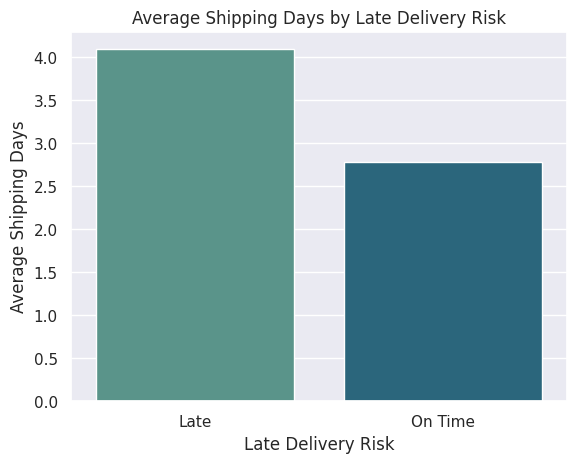

In [106]:
late_delivery_comparison = df.groupby('Late_delivery_risk')['Days for shipping (real)'].mean().reset_index()

# Plot the comparison
sns.barplot(data=late_delivery_comparison, x='Late_delivery_risk', y='Days for shipping (real)', hue='Late_delivery_risk', palette='crest')
plt.title("Average Shipping Days by Late Delivery Risk")
plt.xlabel("Late Delivery Risk")
plt.ylabel("Average Shipping Days")
plt.show()

# Customer segment

In [107]:
customer_segmentation = df.groupby(['Order Region', 'Customer Segment']).agg({
    'Sales': 'sum',
    'Order Id': 'nunique',  # Number of unique orders
    'Order Profit Per Order': 'sum'
}).reset_index()

customer_segmentation.rename(columns={
    'Sales': 'Total Sales',
    'Order Id': 'Total Orders',
    'Order Profit Per Order': 'Total Profit'
}, inplace=True)

customer_segmentation

,Order Region,Customer Segment,Total Sales,Total Orders,Total Profit
0,Canada,Consumer,9.542350e+04,150,12551.109985
1,Canada,Corporate,5.284418e+04,94,5147.089974
2,Canada,Home Office,3.859336e+04,65,6202.510001
3,Caribbean,Consumer,8.167988e+05,1410,77058.319810
4,Caribbean,Corporate,5.285160e+05,884,60911.070124
...,...,...,...,...,...
64,West of USA,Corporate,4.754720e+05,797,51884.220215
65,West of USA,Home Office,2.783577e+05,466,33160.709994
66,Western Europe,Consumer,3.084309e+06,5204,329820.360348
67,Western Europe,Corporate,1.805624e+06,3072,198422.150235


### Segments Description

In [108]:
customer_segmentation.describe()

,Total Sales,Total Orders,Total Profit
count,6.900000e+01,69.000000,69.000000
mean,5.331121e+05,952.927536,57491.347450
std,5.864228e+05,1007.547639,63678.421119
min,1.113972e+04,20.000000,1857.449985
25%,1.609237e+05,276.000000,15980.789988
50%,3.629901e+05,654.000000,37972.480090
75%,6.636799e+05,1294.000000,75965.320278
max,3.084309e+06,5204.000000,329820.360348


In [109]:
customer_segmentation.describe(include='object')

,Order Region,Customer Segment
count,69,69
unique,23,3
top,Canada,Consumer
freq,3,23


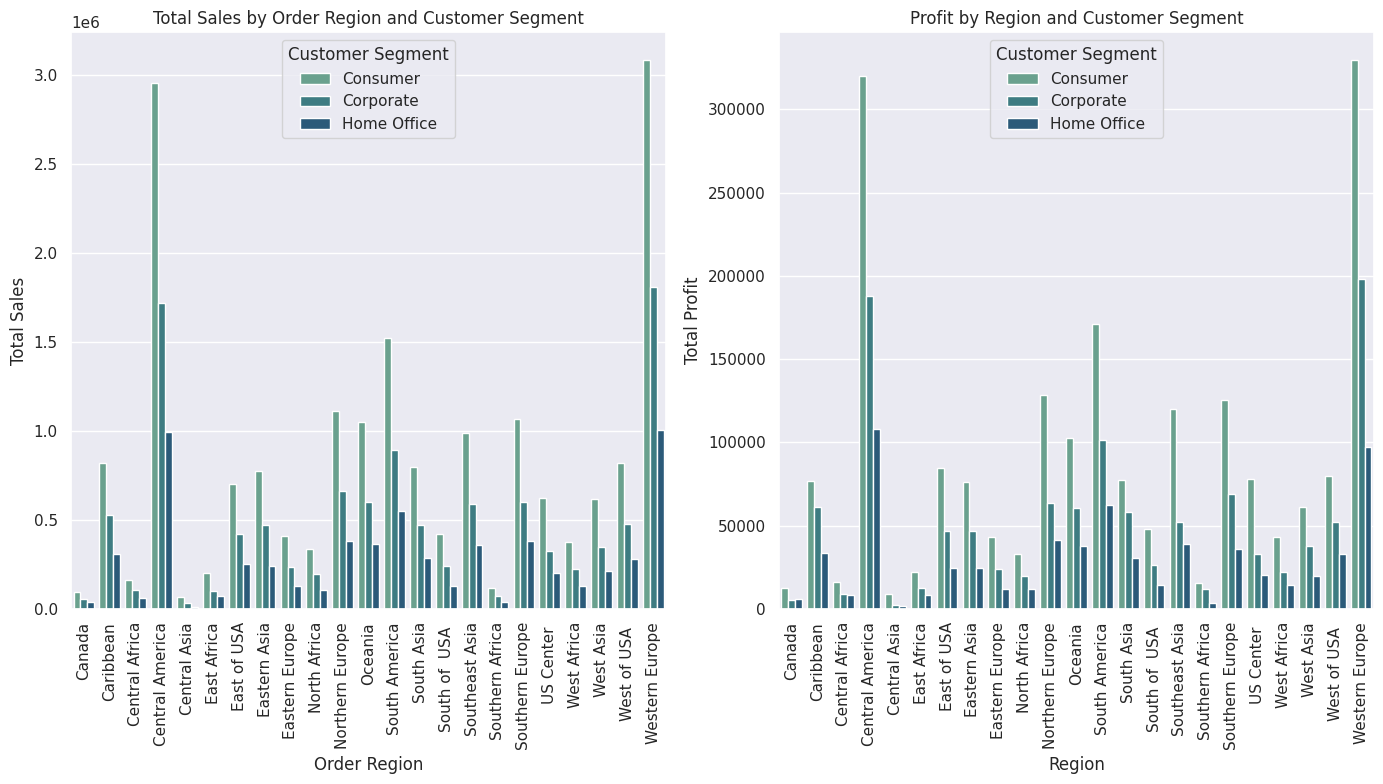

In [110]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
sns.barplot(data=customer_segmentation, x='Order Region', y='Total Sales', hue='Customer Segment', palette="crest")
plt.title('Total Sales by Order Region and Customer Segment')
plt.xlabel('Order Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.barplot(data=customer_segmentation, x='Order Region', y='Total Profit', hue='Customer Segment', palette='crest')
plt.title('Profit by Region and Customer Segment')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.legend(title='Customer Segment')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [111]:
for _, row in customer_segmentation.iterrows():
    region = row['Order Region']
    segment = row['Customer Segment']
    sales = row['Total Sales']
    profit = row['Total Profit']
    orders = row['Total Orders']
    print(f"In {region} region, the {segment} segment had:")
    print(f" - Total Sales: ${sales:,.2f}")
    print(f" - Total Profit: ${profit:,.2f}")
    print(f" - Total Orders: {orders} orders\n")

In Canada region, the Consumer segment had:
 - Total Sales: $95,423.50
 - Total Profit: $12,551.11
 - Total Orders: 150 orders

In Canada region, the Corporate segment had:
 - Total Sales: $52,844.18
 - Total Profit: $5,147.09
 - Total Orders: 94 orders

In Canada region, the Home Office segment had:
 - Total Sales: $38,593.36
 - Total Profit: $6,202.51
 - Total Orders: 65 orders

In Caribbean region, the Consumer segment had:
 - Total Sales: $816,798.82
 - Total Profit: $77,058.32
 - Total Orders: 1410 orders

In Caribbean region, the Corporate segment had:
 - Total Sales: $528,515.97
 - Total Profit: $60,911.07
 - Total Orders: 884 orders

In Caribbean region, the Home Office segment had:
 - Total Sales: $305,704.55
 - Total Profit: $33,856.25
 - Total Orders: 512 orders

In Central Africa region, the Consumer segment had:
 - Total Sales: $160,923.71
 - Total Profit: $15,980.79
 - Total Orders: 276 orders

In Central Africa region, the Corporate segment had:
 - Total Sales: $107,410.

# Sales and Profitability

In [112]:
df[['Sales', 'Order Profit Per Order']].describe()

,Sales,Order Profit Per Order
count,180519.000000,180519.000000
mean,203.772096,21.974989
std,132.273077,104.433526
min,9.990000,-4274.979980
25%,119.980003,7.000000
50%,199.919998,31.520000
75%,299.950012,64.800003
max,1999.989990,911.799988


### Sales and Profit by Customer Segment

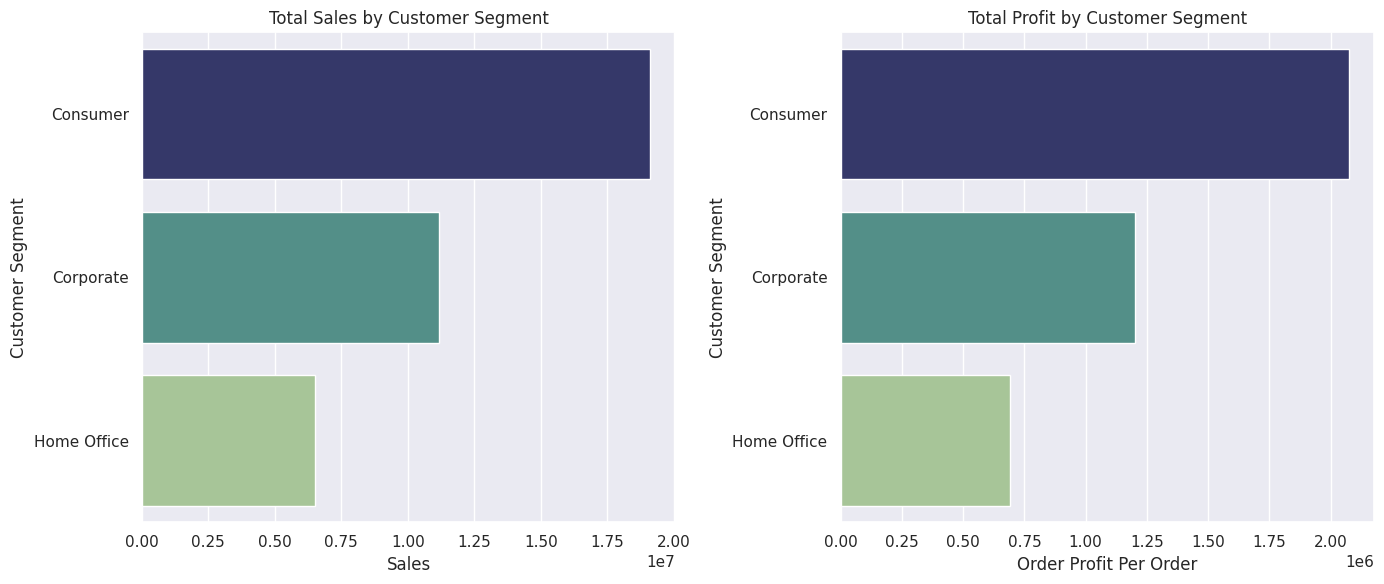

In [113]:
segment_analysis = df.groupby('Customer Segment')[['Sales', 'Order Profit Per Order']].sum().reset_index()

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(data=segment_analysis, x='Sales', y='Customer Segment', hue='Sales', palette="crest", legend=False)
plt.title('Total Sales by Customer Segment')
plt.subplot(1, 2, 2)
sns.barplot(data=segment_analysis, x='Order Profit Per Order', y='Customer Segment', hue="Order Profit Per Order", palette="crest", legend=False)
plt.title('Total Profit by Customer Segment')
plt.tight_layout()
plt.show()


### Sales and Profit by Region

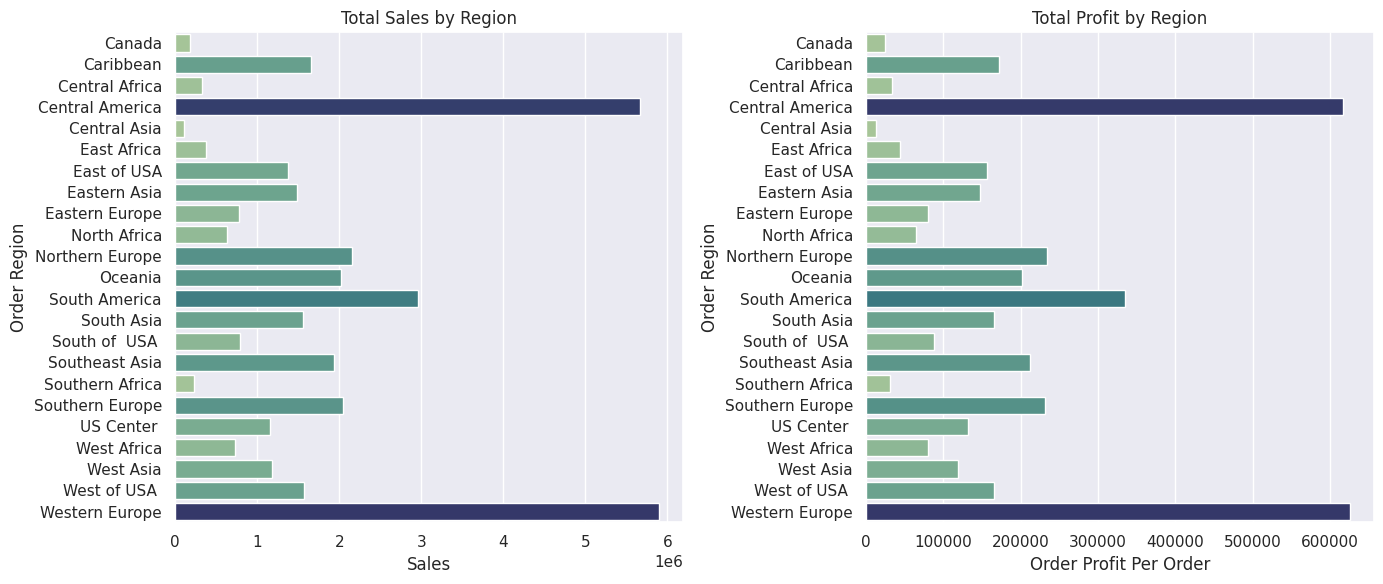

In [114]:
region_analysis = df.groupby('Order Region')[['Sales', 'Order Profit Per Order']].sum().reset_index()
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(data=region_analysis, x='Sales', y='Order Region', hue='Sales', palette="crest", legend=False)
plt.title('Total Sales by Region')
plt.subplot(1, 2, 2, sharey=plt.subplot(1, 2, 1))
sns.barplot(data=region_analysis, x='Order Profit Per Order', y='Order Region', hue="Order Profit Per Order", palette="crest", legend=False)
plt.title('Total Profit by Region')
plt.tight_layout()
plt.show()


### Analyze Profitability per Order

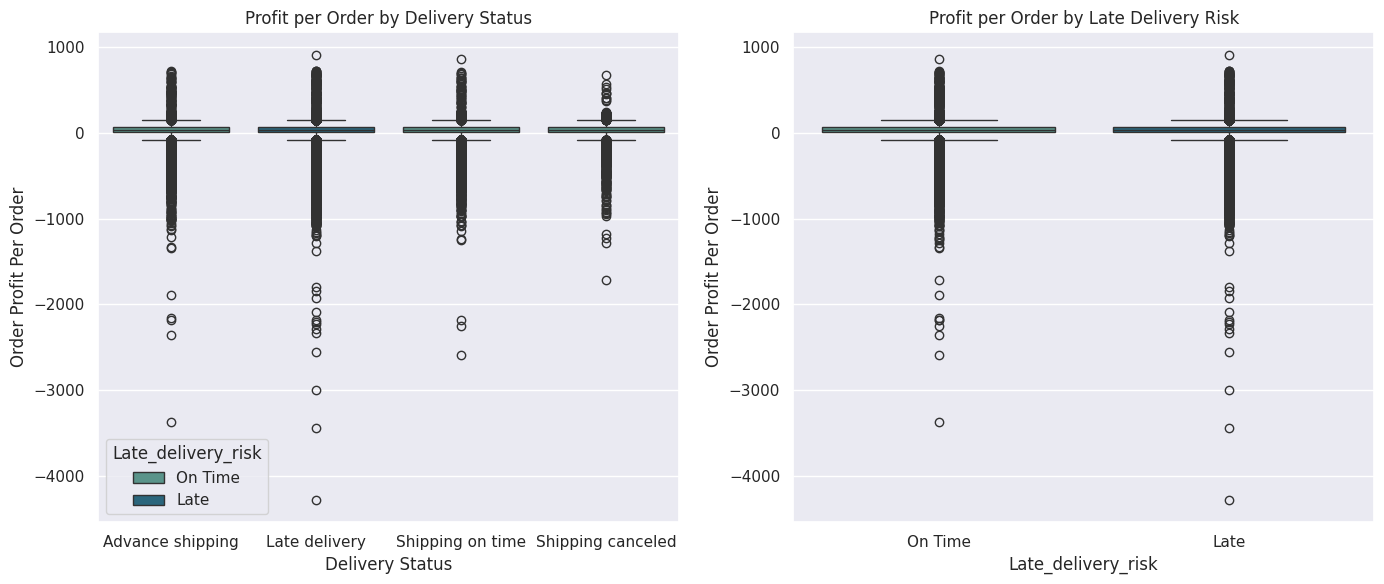

In [115]:
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Delivery Status', y='Order Profit Per Order', hue='Late_delivery_risk', palette='crest')
plt.title('Profit per Order by Delivery Status')
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Late_delivery_risk', y='Order Profit Per Order', hue='Late_delivery_risk', palette='crest')
plt.title('Profit per Order by Late Delivery Risk')
plt.tight_layout()
plt.show()


### Customer Loyalty and Sales per Customer

In [116]:
sales_per_customer = df.groupby('Customer Id')['Sales'].sum()
profit_per_customer = df.groupby('Customer Id')['Order Profit Per Order'].sum()

customer_summary = pd.DataFrame({
    'Sales': sales_per_customer,
    'Profit': profit_per_customer
}).reset_index()

average_sales = customer_summary['Sales'].mean()
average_profit = customer_summary['Profit'].mean()

print(f"Average Sales per Customer: ${average_sales:.2f}")
print(f"Average Profit per Customer: ${average_profit:.2f}")

Average Sales per Customer: $1781.17
Average Profit per Customer: $192.08


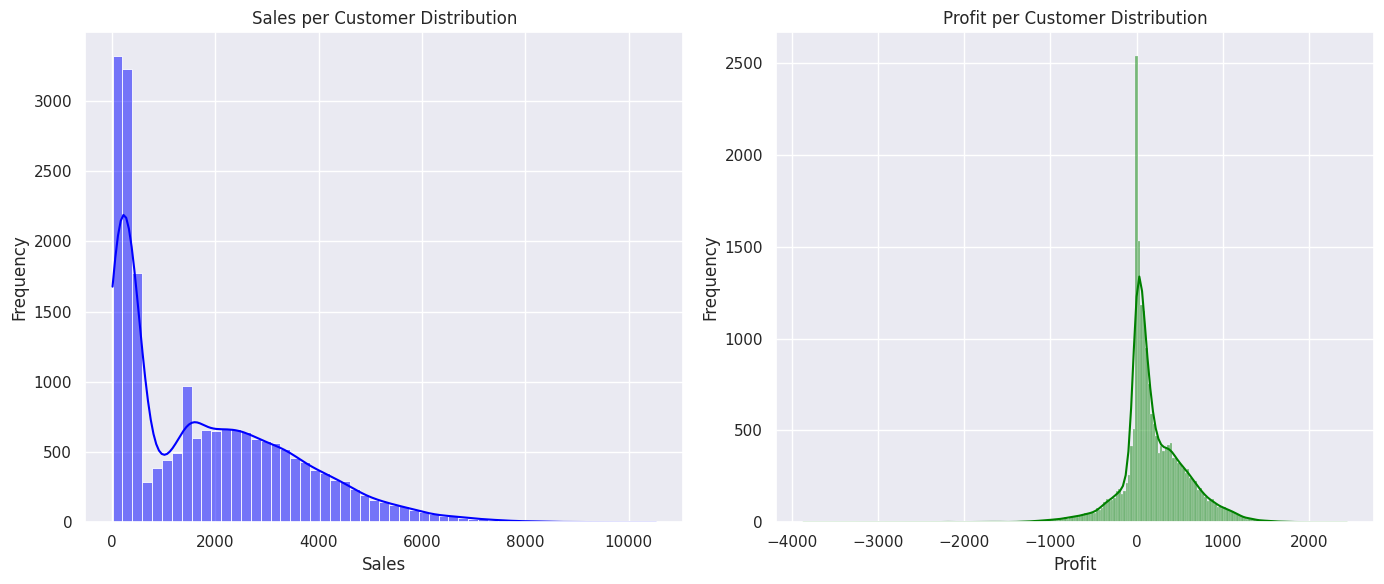

In [117]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(customer_summary['Sales'], kde=True, color='blue')
plt.title('Sales per Customer Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(customer_summary['Profit'], kde=True, color='green')
plt.title('Profit per Customer Distribution')
plt.xlabel('Profit')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

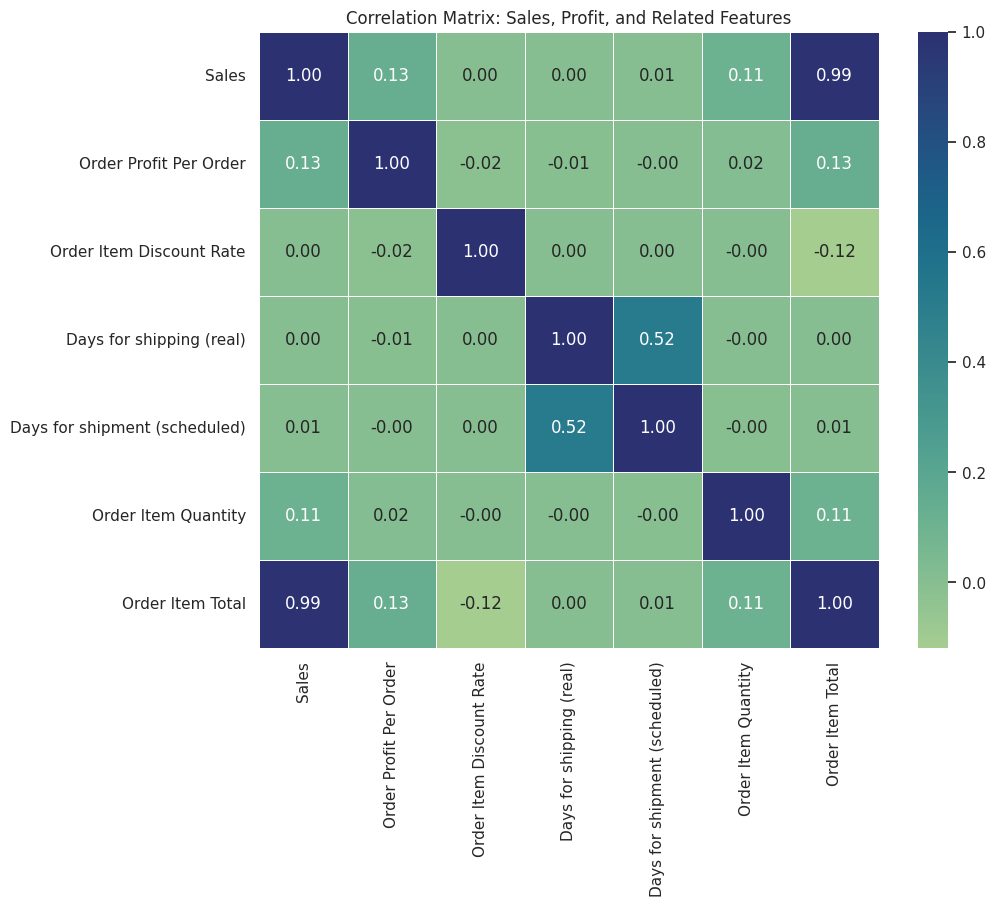

In [118]:
correlation_matrix = df[['Sales', 'Order Profit Per Order', 'Order Item Discount Rate',
                         'Days for shipping (real)', 'Days for shipment (scheduled)',
                         'Order Item Quantity', 'Order Item Total']].corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix: Sales, Profit, and Related Features')
plt.show()

In [119]:
df.to_csv('cleaned_data.csv', index=False)

In [120]:
data = pd.read_csv('cleaned_data.csv')

In [121]:
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,shipping date (DateOrders),Shipping Mode,Delivery Time,Shipping Delay
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,On Time,73,Sporting Goods,Caguas,...,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,2018-02-03 22:56:00,Standard Class,3,-1
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,Late,73,Sporting Goods,Caguas,...,Rajastán,PENDING,1360,73,Smart watch,327.75,2018-01-18 12:27:00,Standard Class,5,1
2,CASH,4,4,-247.779999,309.720001,Shipping on time,On Time,73,Sporting Goods,San Jose,...,Rajastán,CLOSED,1360,73,Smart watch,327.75,2018-01-17 12:06:00,Standard Class,4,0
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,On Time,73,Sporting Goods,Los Angeles,...,Queensland,COMPLETE,1360,73,Smart watch,327.75,2018-01-16 11:45:00,Standard Class,3,-1
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,On Time,73,Sporting Goods,Caguas,...,Queensland,PENDING_PAYMENT,1360,73,Smart watch,327.75,2018-01-15 11:24:00,Standard Class,2,-2


In [122]:
data.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Id', 'Customer Segment', 'Customer State',
       'Customer Street', 'Department Id', 'Department Name', 'Latitude',
       'Longitude', 'Market', 'Order City', 'Order Country',
       'Order Customer Id', 'order date (DateOrders)', 'Order Id',
       'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Region',
       'Order State', 'Order Status', 'Product Card Id', 'Product Category Id',
       'Product Name', 'Product Price', 'shipping date (DateOrders)',
       'Shipping Mode', 'Delivery Time', 'Shipping Delay'],
      dtype='o

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 46 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  object 
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Id                    180519 non-null  int64  
 12  Customer Segment              

In [124]:
data['Late_delivery_risk'] = LabelEncoder().fit_transform(data['Late_delivery_risk'])
data['Market'] = LabelEncoder().fit_transform(data['Market'])
data['Customer Segment'] = LabelEncoder().fit_transform(data['Customer Segment'])
data['Order Status'] = LabelEncoder().fit_transform(data['Order Status'])
data['Shipping Mode'] = LabelEncoder().fit_transform(data['Shipping Mode'])
data['Delivery Status'] = LabelEncoder().fit_transform(data['Delivery Status'])
data['Order Region'] = LabelEncoder().fit_transform(data['Order Region'])
data['Department Name'] = LabelEncoder().fit_transform(data['Department Name'])

In [125]:
print(f'Late_delivery_risk: {data["Late_delivery_risk"].nunique()}')
print(f'Market: {data["Market"].nunique()}')
print(f'Customer Segment: {data["Customer Segment"].nunique()}')
print(f'Order Status: {data["Order Status"].nunique()}')
print(f'Shipping Mode: {data["Shipping Mode"].nunique()}')
print(f'Delivery Status: {data["Delivery Status"].nunique()}')
print(f'Order Region: {data["Order Region"].nunique()}')
print(f'Department Name: {data["Department Name"].nunique()}')

Late_delivery_risk: 2
Market: 5
Customer Segment: 3
Order Status: 9
Shipping Mode: 4
Delivery Status: 4
Order Region: 23
Department Name: 11


In [126]:
data.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Id', 'Customer Segment', 'Customer State',
       'Customer Street', 'Department Id', 'Department Name', 'Latitude',
       'Longitude', 'Market', 'Order City', 'Order Country',
       'Order Customer Id', 'order date (DateOrders)', 'Order Id',
       'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Region',
       'Order State', 'Order Status', 'Product Card Id', 'Product Category Id',
       'Product Name', 'Product Price', 'shipping date (DateOrders)',
       'Shipping Mode', 'Delivery Time', 'Shipping Delay'],
      dtype='o

In [127]:
CM = data[['Market', 'Customer Segment', 'Order Status', 'Shipping Mode',
                         'Delivery Status', 'Order Region', 'Days for shipment (scheduled)',
                         'Order Item Quantity', 'Department Name', 'Delivery Time', 'Sales']].corr()

CM

,Market,Customer Segment,Order Status,Shipping Mode,Delivery Status,Order Region,Days for shipment (scheduled),Order Item Quantity,Department Name,Delivery Time,Sales
Market,1.000000,-0.000108,-0.003820,-0.001098,0.003374,-0.075458,-0.001913,-0.002521,-0.007520,-0.000512,-0.036507
Customer Segment,-0.000108,1.000000,-0.003060,-0.001634,-0.002875,-0.003148,-0.000086,-0.002858,-0.002617,0.002890,-0.004862
Order Status,-0.003820,-0.003060,1.000000,0.004344,0.000054,0.001952,0.003758,0.001281,-0.001166,0.008565,0.002247
Shipping Mode,-0.001098,-0.001634,0.004344,1.000000,-0.081300,-0.008209,0.919296,-0.002386,-0.005157,0.518550,0.003570
Delivery Status,0.003374,-0.002875,0.000054,-0.081300,1.000000,0.001368,-0.172323,-0.002674,-0.007667,0.028299,-0.001442
Order Region,-0.075458,-0.003148,0.001952,-0.008209,0.001368,1.000000,-0.009411,-0.015781,0.008150,-0.004000,0.027889
Days for shipment (scheduled),-0.001913,-0.000086,0.003758,0.919296,-0.172323,-0.009411,1.000000,-0.002925,-0.002728,0.534385,0.006327
Order Item Quantity,-0.002521,-0.002858,0.001281,-0.002386,-0.002674,-0.015781,-0.002925,1.000000,0.219187,-0.000879,0.106442
Department Name,-0.007520,-0.002617,-0.001166,-0.005157,-0.007667,0.008150,-0.002728,0.219187,1.000000,-0.002047,0.053804
Delivery Time,-0.000512,0.002890,0.008565,0.518550,0.028299,-0.004000,0.534385,-0.000879,-0.002047,1.000000,0.002729


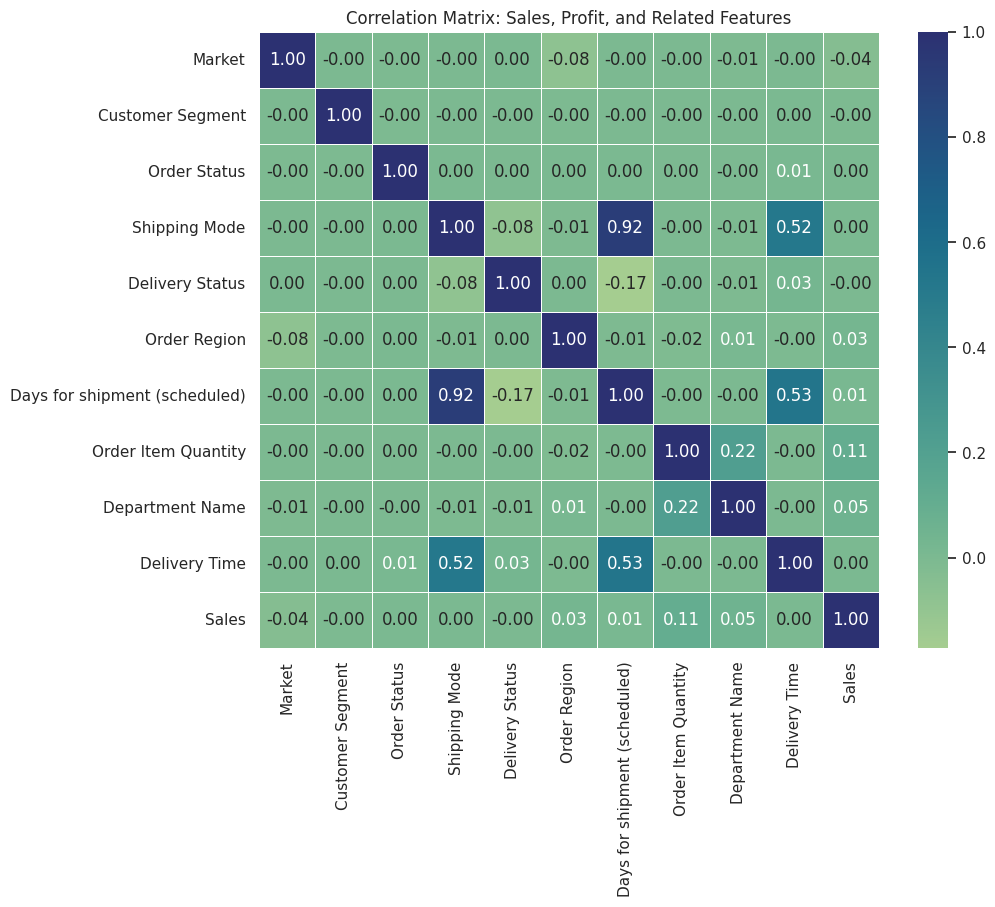

In [128]:
plt.figure(figsize=(10,8))
sns.heatmap(CM, annot=True, cmap='crest', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix: Sales, Profit, and Related Features')
plt.show()

# Splitting data

In [129]:
x = data[['Shipping Mode', 'Days for shipment (scheduled)', 'Order Item Quantity', 'Department Name', 'Delivery Time']]
y = data['Late_delivery_risk']

In [130]:
x_test, x_train, y_test, y_train = train_test_split(x, y, test_size=0.2, random_state=42)

# Model Training

In [131]:
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)

DecisionTreeClassifier()

# Model Testing

In [132]:
y_pred_DT= DT.predict(x_test)
y_pred_DT

array([0, 1, 0, ..., 0, 0, 0])

In [133]:
#print the class report
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96     79180
           1       0.96      0.93      0.94     65235

    accuracy                           0.95    144415
   macro avg       0.95      0.95      0.95    144415
weighted avg       0.95      0.95      0.95    144415



Text(91.25, 0.5, 'Actual')

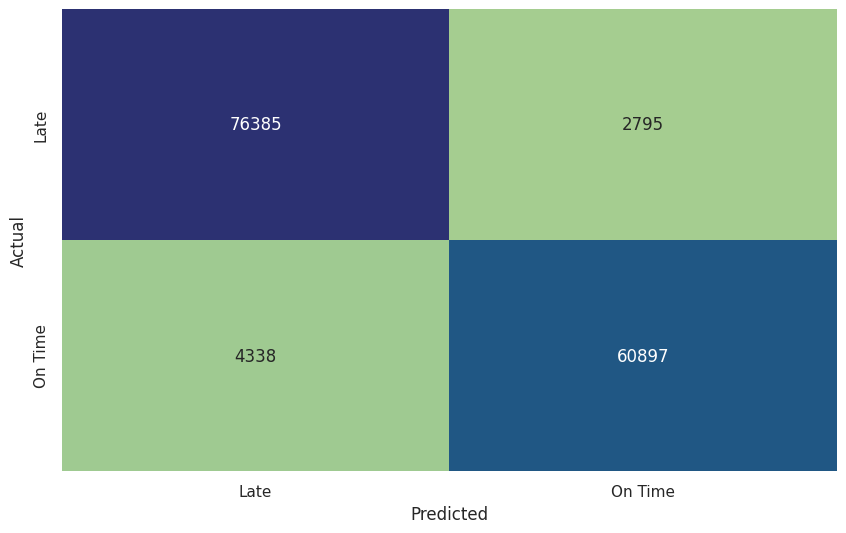

In [134]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_DT), annot=True, fmt='d', cmap='crest', cbar=False, xticklabels=['Late', 'On Time'], yticklabels=['Late', 'On Time'])
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [135]:
KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)

y_pred_KNN = KNN.predict(x_test)
y_pred_KNN

array([0, 1, 0, ..., 0, 0, 0])

In [136]:
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     79180
           1       0.97      0.91      0.94     65235

    accuracy                           0.95    144415
   macro avg       0.95      0.94      0.95    144415
weighted avg       0.95      0.95      0.95    144415



Text(91.25, 0.5, 'Actual')

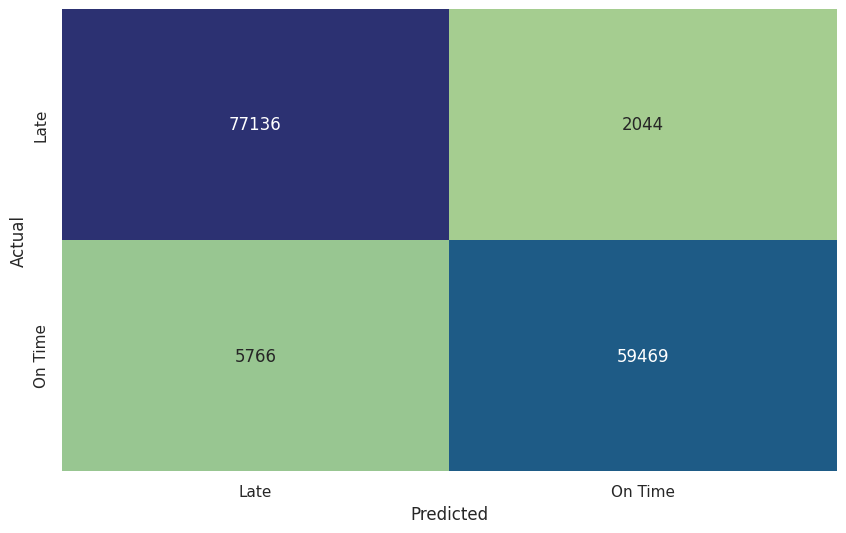

In [137]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_KNN), annot=True, fmt='d', cmap='crest', cbar=False, xticklabels=['Late', 'On Time'], yticklabels=['Late', 'On Time'])
plt.xlabel('Predicted')
plt.ylabel('Actual')